In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
df = pd.read_excel("dataset/dataset.xlsx")
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [3]:
Y = df[['SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)']]

X = df.iloc[:,6:]

In [16]:
dados_faltantes = X.isna().mean().sort_values(ascending=True)
dados_faltantes

Influenza A                           0.760099
Respiratory Syncytial Virus           0.760099
Influenza B                           0.760099
Parainfluenza 4                       0.760454
CoronavirusNL63                       0.760454
                                        ...   
Urine - Sugar                         1.000000
D-Dimer                               1.000000
Prothrombin time (PT), Activity       1.000000
Mycoplasma pneumoniae                 1.000000
Partial thromboplastin time (PTT)     1.000000
Length: 105, dtype: float64

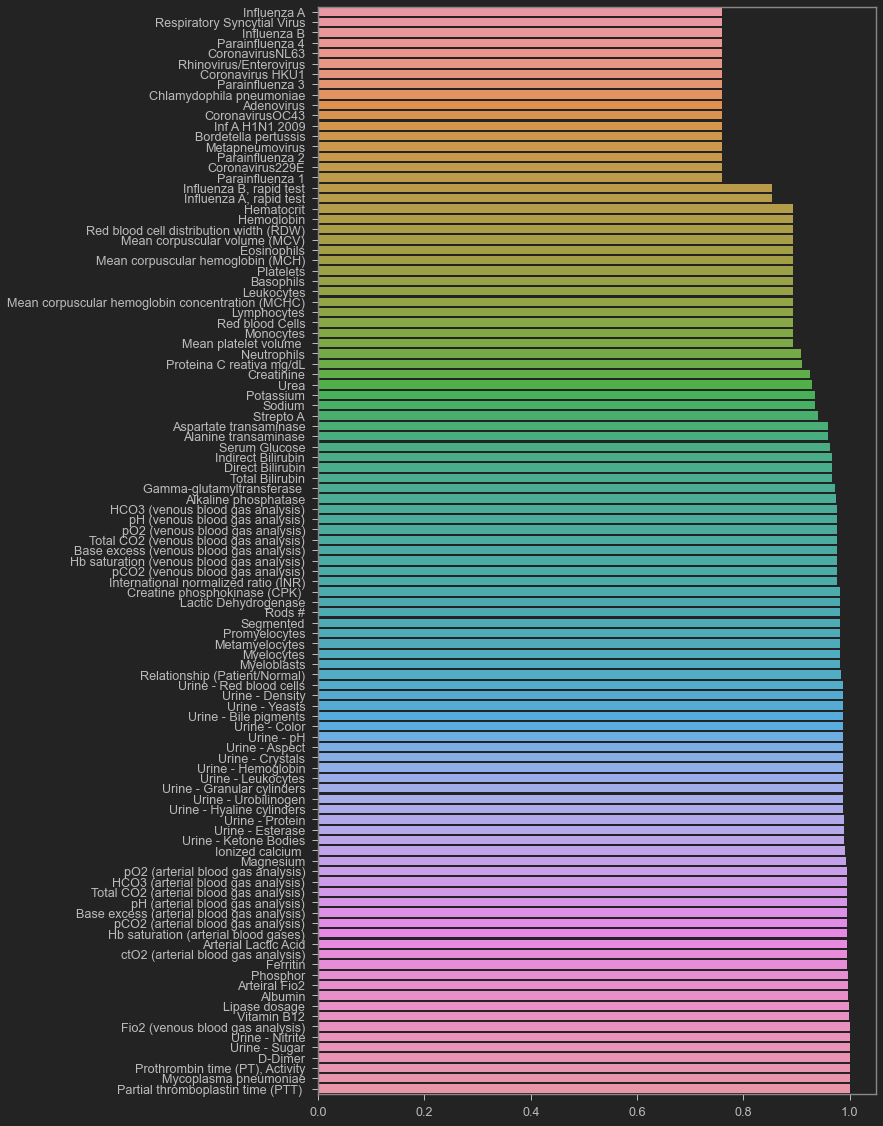

In [19]:
plt.figure(figsize=(10,20));
sns.barplot(x=dados_faltantes, y=dados_faltantes.index);

In [99]:
X_1 = X.loc[:,dados_faltantes < 0.9].copy(deep=True)

In [100]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Hematocrit                                        603 non-null    float64
 1   Hemoglobin                                        603 non-null    float64
 2   Platelets                                         602 non-null    float64
 3   Mean platelet volume                              599 non-null    float64
 4   Red blood Cells                                   602 non-null    float64
 5   Lymphocytes                                       602 non-null    float64
 6   Mean corpuscular hemoglobin concentration (MCHC)  602 non-null    float64
 7   Leukocytes                                        602 non-null    float64
 8   Basophils                                         602 non-null    float64
 9   Mean corpuscular he

In [101]:
categorical = X_1.select_dtypes(include="object").columns

In [108]:
[X_1[column].unique() for column in categorical]

[array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'detected', 'not_detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected', 'detected'], dtype=object),
 array([nan, 'not_detected'], dtype=object),
 array([nan, 'negative', 'positive'], dtype

In [94]:
X_1[categorical] = X_1[categorical].replace({"detected": 1, "not_detected": 0, "positive": 1, "negative":0}).astype("object")

In [96]:
X_1[categorical]

,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
